# Solution Graded Exercise 8: Hopfield Network model of associative memory

first name: Olesia

last name: Altunina

sciper: 285467

date: 23.04.2018

*Your teammate*

first name of your teammate: -

last name of your teammate: -

sciper of your teammate: -


Note: You are allowed to discuss the concepts with your class mates. You are not allowed to share code. You have to understand every line of code you write in this notebook. We will ask you questions about your submission during a fraud detection session during the last week of the semester.

** Remember **

If you are asked for plots: The appearance of the plots (labelled axes, ** useful scaling **, etc.) is important!

If you are asked for discussions: Answer in a precise way and try to be concise. 


** Submission **

Rename this notebook to Ex8_FirstName_LastName_Sciper.ipynb and upload that single file on moodle before the deadline.

** Link to the exercise **

http://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/hopfield-network.html

## \* \* \* \* Programming Notes : Copying and slicing lists and numpy arrays \* \* \* \*
We would like to take the opportunity to bring to your attention certain features of Python, that might lead to unwanted behaviour and serious mistakes, if one is not aware of them. 
Please check the Python Cheat Sheet file on the moodle (https://moodle.epfl.ch/mod/page/view.php?id=981134 Part 4 of the ipynb file) for some examples of the following notes:

* Assigning a list to a new variable does not create a copy of the list, but creates a variable that points to the list. This means that modifying the second variable, also modifies the original list.
* Assigning a slice of a list to a new variable, creates a copy of the list. Any modification to the sliced list does not modify the original.

Now when it comes to numpy arrays:
* Assigning a numpy array to a new variable does not create a copy of the array, but creates a variable that points to the array. This means that modifying the second variable, also modifies the original array. (same as above)
* Assigning a slice of a numpy array to a new variable creates a variable that points to the corresponding elements of the original array as well! (contrary to what we saw above!) This means that modifying the second variable, also modifies the original array!
* To copy the original array and ensure that it is not modified by any modification of its copied version, the method copy() should be used.

# Exercise 8.1. Getting started

In [1]:
%matplotlib inline
from neurodynex.hopfield_network import network, pattern_tools, plot_tools
from matplotlib import pyplot as plt
import numpy as np

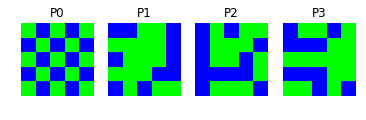

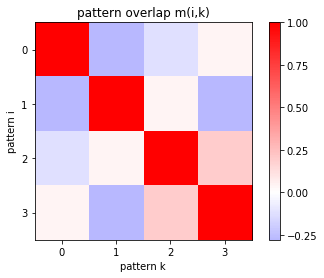

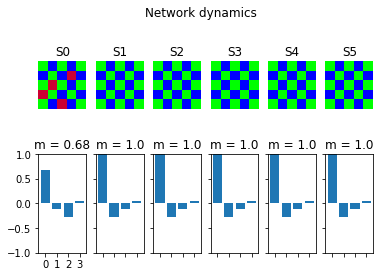

In [3]:
pattern_size = 5

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=4)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


# 8.3. Exercise: N=4x4 Hopfield-network
## 8.3.1. Question: Storing a single pattern
**[2 + 2 + 3 points]**


- Create a network with N=16 neurons.
- Create a single 4 by 4 checkerboard pattern.
- Store the checkerboard in the network.
- Set the initial state of the network to a noisy version of the checkerboard (nr_flipped_pixels = 5).
- Let the network dynamics evolve for 4 iterations.
- Plot the sequence of network states along with the overlap of network state with the checkerboard.

In [4]:
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))
#plot_tools.plot_pattern_list(pattern_list)
# how similar are the random patterns and the checkerboard? Check the overlaps
overlap_matrix = pattern_tools.compute_overlap_matrix(pattern_list)
#plot_tools.plot_overlap_matrix(overlap_matrix)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=5)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
#plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")


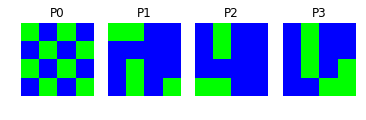

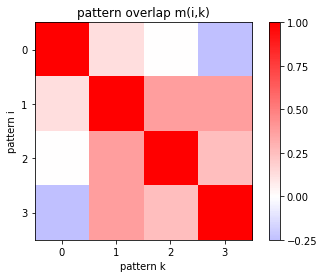

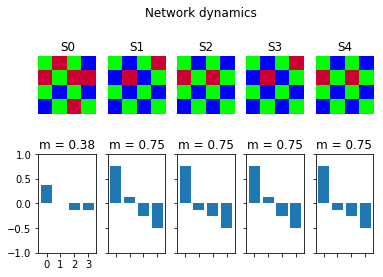

In [5]:
# Plot the sequence of network states along with the overlap of network state with the checkerboard
plot_tools.plot_pattern_list(pattern_list)
plot_tools.plot_overlap_matrix(overlap_matrix)
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Now test whether the network can still retrieve the pattern if we increase the number of flipped pixels. What happens at nr_flipped_pixels = 8, what if nr_flipped_pixels > 8 ?

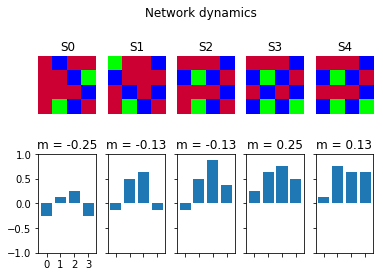

In [9]:
# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=10)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

If `nr_of_flips == 8`, then the **overlap** between checkerboard pattern and the flipped one **== 0**. => Checkerboard pattern doesn't contribute to state updates.
$\DeclareMathOperator{\sign}{sign}$

If `nr_of_flips > 8`, then the **overlap** between checkerboard pattern and the flipped one **< 0**. => Checkerboard pattern contributes negatively to state updates: $S_i(t+1)=\sign (p_i^{\nu} m^{\nu}(t) \, + \, ...)$, which leads to positive overlap stepwise.

## 8.3.2. Question: the weights matrix
**[1 + 3 + 2 points]**

1. Create a new 4x4 network. Do not yet store any pattern.
2. What is the size of the network matrix?
3. Visualize the weight matrix using the function plot_tools.plot_nework_weights(). It takes the network as a parameter.
4. Create a checkerboard, store it in the network.
5. Plot the weights matrix. What weight values do occur?
6. Create a new 4x4 network
7. Create an L-shaped pattern (look at the pattern factory doc), store it in the network
8. Plot the weights matrix. What weight values do occur?
9. Create a new 4x4 network
10. Create a checkerboard and an L-shaped pattern. Store both patterns in the network
11. Plot the weights matrix. What weight values do occur? How does this matrix compare to the two previous matrices?

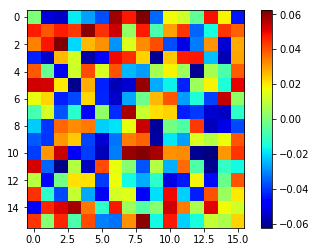

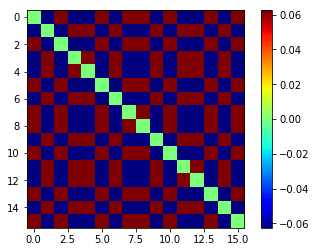

In [10]:
# write your code here: Bullet points 1-5
pattern_size = 4

# create an instance of the class HopfieldNetwork
hopfield_net_checker = network.HopfieldNetwork(nr_neurons=pattern_size**2)
plot_tools.plot_nework_weights(hopfield_net_checker)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]
hopfield_net_checker.store_patterns(pattern_list)

plot_tools.plot_nework_weights(hopfield_net_checker)

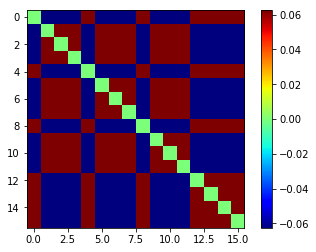

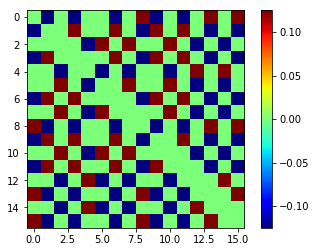

In [11]:
# write your code here: Bullet points 6-11

##--- L PATTERN ---##
# create an instance of the class HopfieldNetwork
hopfield_net_L = network.HopfieldNetwork(nr_neurons=pattern_size**2)
#plot_tools.plot_nework_weights(hopfield_net)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
L_pattern = factory.create_L_pattern()
pattern_list = [L_pattern]
hopfield_net_L.store_patterns(pattern_list)

plot_tools.plot_nework_weights(hopfield_net_L)

##--- L & CHECKERBOARD PATTERNS ---##
# create an instance of the class HopfieldNetwork
hopfield_net_L_check = network.HopfieldNetwork(nr_neurons=pattern_size**2)
#plot_tools.plot_nework_weights(hopfield_net)

# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
pattern_list = [checkerboard, L_pattern]
hopfield_net_L_check.store_patterns(pattern_list)

plot_tools.plot_nework_weights(hopfield_net_L_check)

How does this matrix compare to the two previous matrices?

In [12]:
np.all(hopfield_net_checker.weights + hopfield_net_L.weights == hopfield_net_L_check.weights)

True

This shows that the weights are additive with respect to the stored patterns.

## 8.3.3. Question (optional): Weights Distribution

In [ ]:
# You can easily plot a histogram by adding the following two lines to your script. 
#It assumes you have stored your network in the variable ‘hopfield_net’.
"""
plt.figure()
plt.hist(hopfield_net.weights.flatten())
"""

# 8.4. Exercise: Capacity of an N=100 Hopfield-network
## 8.4.1. Associative memory.
#### [2 points]

A Hopfield network implements so called associative or content-adressable memory. Explain what this means. (max 4 lines)


- In associative memory paradigm, a particular memory does not have a single specific address (like in von Neuman's architecture) but is stored in the connections \[between the neurons\] themselves.
- Memory of a Hopfield network is content-adressable in a sense that one can retrieve a memorized concept (pattern) by providing the noisy content that is a part of it (remembering the concept of an apple by its smell/taste/shape/etc.).

## 8.4.2. Capacity of the network.
#### [1 points]

Using the value $C_{store}$ given in the book, how many patterns can you store in a N=10x10 network? Use this number K in the next question:

$$C_{store} = 0.138$$
$$M^{max} = K = \lfloor 100 \cdot 0.138 \rfloor = \lfloor 13.8 \rfloor = 13$$

## 8.4.3. Checkerboard and random patterns.
**\[3 points\]**

Create an N=10x10 network and store a checkerboard pattern together with (K-1) random patterns. Then initialize the network with the unchanged checkerboard pattern. Let the network evolve for five iterations.

Rerun your script a few times. What do you observe?

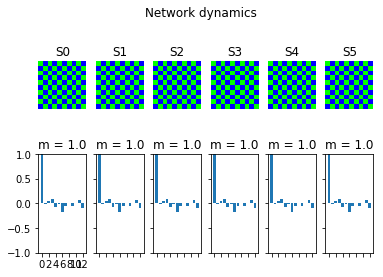

In [13]:
pattern_size = 10

# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
# instantiate a pattern factory
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)
# create a checkerboard pattern and add it to the pattern list
checkerboard = factory.create_checkerboard()
pattern_list = [checkerboard]

# add random patterns to the list
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=12, on_probability=0.5))
#plot_tools.plot_pattern_list(pattern_list)

# let the hopfield network "learn" the patterns. Note: they are not stored
# explicitly but only network weights are updated !
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
checker_init_state = pattern_tools.flip_n(checkerboard, nr_of_flips=0)
hopfield_net.set_state_from_pattern(checker_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = factory.reshape_patterns(states)
# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Rerun your script a few times. What do you observe?

**\[2 points\]**

- If the overlap with the random patterns is less than ~0.2, everything stays the same.
- If it's between ~0.2 and ~0.3, the net introduces a small number of flipped pixels \[with respect to the checkerboard pattern\], and this number stabilises stepwise (checked this at `nr_steps=8`).
- If it's more than ~0.3, the overlap with the checkerboard pattern decreases stepwise.

# 8.5. Exercise: Non-random patterns
## 8.5.1. Alphabet.

the alphabet is stored in an object of type: <type 'dict'>
letters are patterns of size: (10, 10). Create a network of corresponding size


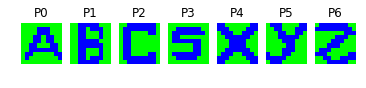

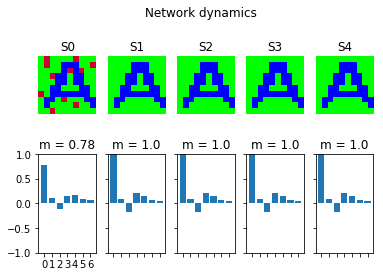

In [14]:
# the letters we want to store in the hopfield network
letter_list = ['A', 'B', 'C', 'S', 'X', 'Y', 'Z']

# set a seed to reproduce the same noise in the next run
np.random.seed(123)

abc_dictionary = pattern_tools.load_alphabet()
print("the alphabet is stored in an object of type: {}".format(type(abc_dictionary)))
# access the first element and get it's size (they are all of same size)
pattern_shape = abc_dictionary['A'].shape
print("letters are patterns of size: {}. Create a network of corresponding size".format(pattern_shape))
# create an instance of the class HopfieldNetwork
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])

# create a list using Pythons List Comprehension syntax:
pattern_list = [abc_dictionary[key] for key in letter_list]
plot_tools.plot_pattern_list(pattern_list)

# store the patterns
hopfield_net.store_patterns(pattern_list)

# create a noisy version of a pattern and use that to initialize the network
noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(
    states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.5.2. Add a letter.
**\[2 points\]**

Add the letter ‘R’ to the letter list and store it in the network.

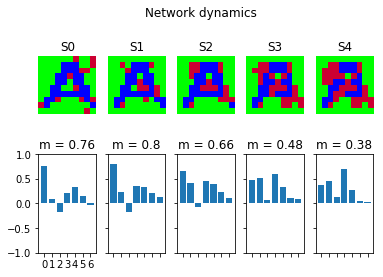

In [15]:
hopfield_net = network.HopfieldNetwork(nr_neurons= pattern_shape[0]*pattern_shape[1])
hopfield_net.store_patterns(pattern_list + [abc_dictionary['R']])

noisy_init_state = pattern_tools.get_noisy_copy(abc_dictionary['A'], noise_level=0.2)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

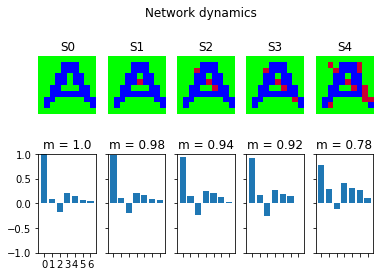

In [16]:
hopfield_net.set_state_from_pattern(abc_dictionary['A'])

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Is the pattern ‘A’ still a fixed point? 
Does the overlap between the network state and the reference pattern ‘A’ always decrease? (max 3 lines)

**\[3 points\]**

- No, 'A' is no more a fixed point after adding 'R'.
- First, the overlap between the \[initially 'A' + 0.2-random\] network state and the reference pattern 'A' increases, and then (after S1) decreases.

## 8.5.3. Capacity.
**\[3 points\]**

Given that the letters are highly correlated patterns $-$ and the capacity of a Hopfield networks is defined for random patterns $-$ my guess is that this network can only store 1 letter.

In [17]:
hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_shape[0]*pattern_shape[1])
hopfield_net.store_patterns(pattern_list)

In [18]:
def plot_letter_overlap(letter):
    hopfield_net.set_state_from_pattern(abc_dictionary[letter])

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net.run_with_monitoring(nr_steps=4)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

    # plot the states of the network
    plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

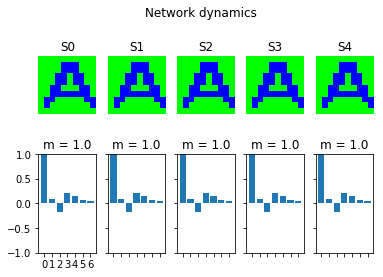

In [19]:
letter_list_loc = letter_list[:1]
for letter in letter_list_loc:
    plot_letter_overlap(letter)

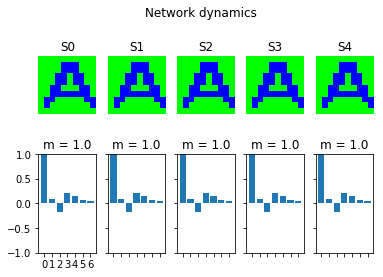

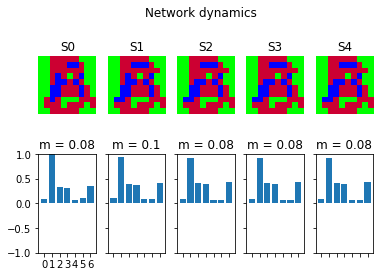

In [20]:
letter_list_loc = letter_list[:2]
for letter in letter_list_loc:
    plot_letter_overlap(letter)

Explain the discrepancy between the network capacity C (computed above) and your observation. (max 4 lines)

**\[3 points\]**

The letters are highly correlated patterns, which means that $\exists i : 1 - \sum_{\mu \neq \nu} \sum_{j} p_i^\mu p_i^\nu p_j^\mu p_j^\nu \ngeq 0$, thus we cannot use the calculated network capacity.

# 8.6. Implementing different types of dynamics
### *** Note:*** this exercise is NOT a bonus and it is graded
## 8.6.1. Exercise:
Implement a Hopfield network with asynchronous dynamics (use the function set_dynamics_sign_async()). Store 5 random patterns (take inspiration from exercise 8.3). Fix a noisy initial state, run the network a few times and observe the performance over the different trials.

Parameters: network size=5x5, number of rnd patterns=5, on probability=0.5, number of flips=8.
#### [5 points]

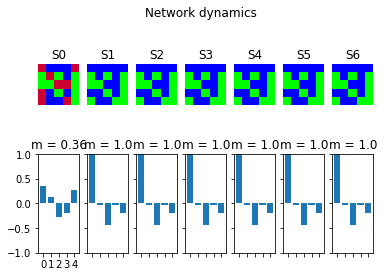

In [37]:
pattern_size = 5

hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))

hopfield_net.store_patterns(pattern_list)
hopfield_net.set_dynamics_sign_async()

noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=8)
hopfield_net.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net.run_with_monitoring(nr_steps=6)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

Comment on your results (max 3 lines).

**\[3 points\]**

- The overlap vector stabilises.
- The net either retrieves a specific pattern or becomes stuck in a new one.

## 8.6.2. Stochastic neuron
Implement a synchronous and stochastic neuron. Use the function HopfieldNetwork.set_dynamics_to_user_function() in order to pass _get_sigmoid_update_function(), which you should implement. 

In the stochastic network the dynamics depend on the so-called inverse temperature $\beta$. The temperature in this system can be seen as noise. The activity $S_i(t+1)$ in the next time-step follows the probability distribution: 
\begin{equation}
P\left(S_i(t+1)=1\right) = \frac1{1+\exp\left[-h_i(t)\beta\right]} \qquad \textrm{ where } \qquad h_i(t) = \sum_j w_{ij} S_j(t)
\end{equation}
That is, it is more likely for a neuron $i$ to be set to +1 if its input $h_i$ is higher.

Parameters: network size = 5x5, number of rnd patterns = 5, on probability = 0.5, number of flips = 8, $\beta$=10.

*** Hint 1: *** For inspiration check out the source code of the function _get_sign_update_function()

*** Hint 2: *** In order to implement stochasticity, we suggest to use the python-library numpy.random.

#### [7 points]

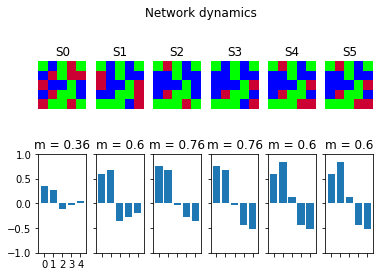

In [175]:
# Synchronous stochastic update
def _get_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a synchronous state update using the sigmoid function (h)
    """
    def upd(state_s0, weights):
        probs = 1/(1+np.exp(-np.dot(weights, state_s0)*beta))
        s1 = np.array([np.random.choice([-1, 1], 1, p=[1-prob, prob])[0] for prob in probs])
        return s1
    return upd

beta = 10
pattern_size = 5

hopfield_net_stoch = network.HopfieldNetwork(nr_neurons=pattern_size**2)
hopfield_net_stoch.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))

hopfield_net_stoch.store_patterns(pattern_list)

noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=8)
hopfield_net_stoch.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_stoch.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

## 8.6.3 Finite temperature
Choose one of the stored patterns (let's say number 1) and flip 10 bits. Then plot the overlap between the network state and this pattern, $m^1$, over time for different values of $\beta$, $\beta\in \left[0.1,2,5,100\right]$.

Parameters: network size = 10x10, number of rnd patterns = 5, on probability = 0.5, number of flips = 10, number of trials = 100, number of steps = 9.

*** Hint 1:***  In order to plot $m^1$ over time, run the script several times and compute the mean  and the standard deviation $\sigma$ of the overlap $m^1$ over trials. You can use the function plt.fill and its parameter $\alpha$ (the transparency), in order to fill with color the area between $+\sigma$ and $-\sigma$.

*** Hint 2: *** Use the function pattern_tools.compute_overlap()

*** Hint 3:*** We suggest to implement and test your code with a smaller network size before getting to the 10x10 units network.
#### [7 points]

In [126]:
def compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps):
    """ For a given hopfield_net and a pattern_list, initialize it with the init_state and run it
    Compute its overlap with the pattern pattern_list[idx] in time (for nr_steps)
    Repeat the above over many trial (nTrials)
    """
    overlap = np.zeros((nTrials, nr_steps+1))
    
    for i in range(0, nTrials):
        
        # learn patterns
        hopfield_net.store_patterns(pattern_list)
        
        # run a synch and stoch Hopfield model with the same initial state
        hopfield_net.set_state_from_pattern(init_state)
        states = hopfield_net.run_with_monitoring(nr_steps=nr_steps)
        
        # let the netwrok dynamics evolve
        # ???
        states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)
        
        for i_step, state in enumerate(states_as_patterns):
            overlap[i, i_step] = pattern_tools.compute_overlap(state, pattern_list[idx])
    return overlap


# Create the patterns and store them

nTrials = 100
nr_steps= 9
betas = [0.1, 2, 5, 100]
idx = 0
pattern_size = 10

overlap_mean = np.zeros((len(betas), nr_steps+1))
overlap_std = np.zeros((len(betas), nr_steps+1))

for j, beta in enumerate(betas):
    
    hopfield_net = network.HopfieldNetwork(nr_neurons=pattern_size**2)
    hopfield_net.set_dynamics_to_user_function(_get_sigmoid_update_function(beta=beta))
    factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

    pattern_list = []
    pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))
    
    init_state = pattern_tools.flip_n(pattern_list[idx], nr_of_flips=10)
    
    overlap = compute_overlap_over_time(hopfield_net, pattern_list, idx, init_state, nTrials, nr_steps)
    overlap_mean[j,:] = np.mean(overlap, axis=0)
    overlap_std[j,:] = np.std(overlap, axis=0)

In [127]:
import scipy.stats

In [128]:
# Plot
def plot_betas(step):
    for j, beta in enumerate(betas):
        mean = overlap_mean[j, step]
        std = overlap_std[j, step]
        plt.ylim(0, 20)
        if std < 0.0005:
            plt.vlines(mean, 0, 100, label='beta={}'.format(beta), color='red')
        else:
            x = np.linspace(mean - 3*std, mean + 3*std, 100)
            y = scipy.stats.norm.pdf(x, mean, std)
            plt.title('step={}'.format(step))
            plt.plot(x, y)
            plt.fill_between(x, y, where=[mean-std < xx < mean+std for xx in x], alpha=0.3, label='beta={}'.format(beta))
        plt.legend()

In [139]:
overlap_mean[:, 0]

array([ 0.8,  0.8,  0.8,  0.8])

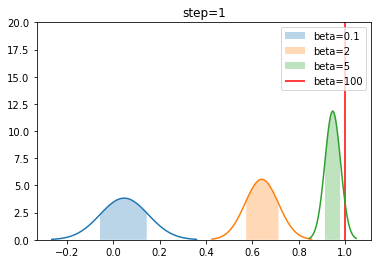

In [130]:
plot_betas(1)

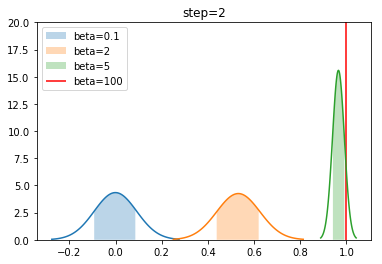

In [131]:
plot_betas(2)

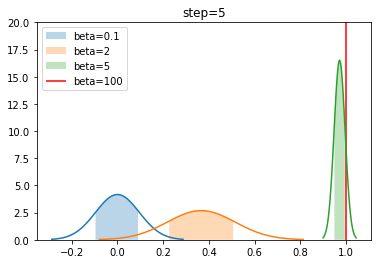

In [132]:
plot_betas(5)

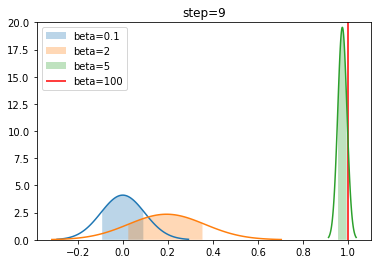

In [133]:
plot_betas(9)

Comment on your plot (max 5 lines).
#### [5 points]

The more the temperature, the more the probability of S being 1, and the less the contribution of $h_i(t)$, thus the less the variance. And vice versa.

Moreover, the lower the $\beta$, the more the contribution of $h_i(t)$, the more the net is susceptible to the contributions from the other patterns.

I would say that $\beta$ here is a kind of a certainty threshold. When it's high, then the net can tolerate a non-perfect overlap and 'jumps' right into the pattern with the largest overlap.

## 8.6.4 Asynchronous stochastic neuron
Implement the stochastic neuron of exercise 8.6.2, but with asynchronous update.

*** Hint: *** For help check out the source code of the function _get_async_sign_update_function()
#### [4 points]

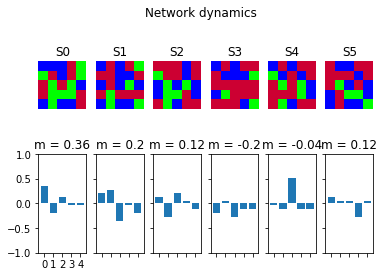

In [162]:
def _get_asynch_sigmoid_update_function(beta):
    """
    for internal use

    Returns:
        A function implementing a asynchronous state update using the sigmoid function
    """
    def upd(state_s0, weights):
        weights_copy = np.copy(weights)
        np.random.shuffle(weights_copy)
        probs = 1/(1+np.exp(np.dot(weights_copy, state_s0)))
        s1 = np.array([np.random.choice([-1, 1], 1, p=[1-prob, prob])[0] for prob in probs])
        return s1
    return upd

beta = 10
pattern_size = 5

hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=5, on_probability=0.5))

hopfield_net_asynch_stoch.store_patterns(pattern_list)

noisy_init_state = pattern_tools.flip_n(pattern_list[0], nr_of_flips=8)
hopfield_net_asynch_stoch.set_state_from_pattern(noisy_init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_asynch_stoch.run_with_monitoring(nr_steps=5)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

# 8.7 Energy 

## 8.7.1 Exercise
Set up a deterministic and asynchronous Hopfield network and store 3 random patterns. 

The energy can be defined as $E=-\sum_i^N \sum_j^N w_{ij} S_i S_j$. 

Implement a function that calculates the energy according to the above definition. 

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5.

#### [4 points]

In [177]:
# Set up your network
beta = 10
pattern_size = 10

hopfield_net_asynch = network.HopfieldNetwork(nr_neurons=pattern_size**2)
hopfield_net_asynch.set_dynamics_sign_async()
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))

hopfield_net_asynch.store_patterns(pattern_list)

def energy(weights, state):
    return -np.dot(np.dot(weights, state.reshape(-1)), state.reshape(-1)), \
            np.linalg.norm(np.dot(weights, state.reshape(-1)))

## 8.7.2 Exercise
Compute the energy of one of the stored patterns: $E (\xi^{\mu})$.

Choose one pattern and gradually flip more and more bits. For that you need to implement a function flip_idx, after checking out the function pattern_tools.flip_n(). How does the energy change and why? (max 3 lines)

*** Hint: *** You can get an intuition by plotting the energy of the state as a function of the number of flipped bits.
#### [1 + 6 + 4 points]

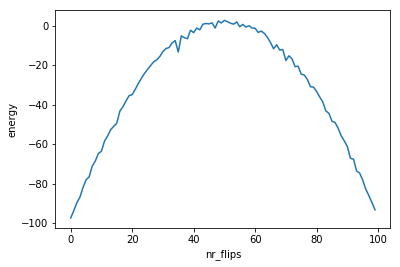

In [178]:
flips = np.arange(pattern_size**2)
e_flips = np.zeros(len(flips))
overlap = np.zeros(len(flips))

for nr_flips in flips:
    e_flips[nr_flips], overlap[nr_flips] = energy(hopfield_net_asynch.weights, \
                                                  pattern_tools.flip_n(pattern_list[0], nr_of_flips=nr_flips))
    
# Plot
plt.plot(flips, e_flips)
plt.xlabel('nr_flips')
plt.ylabel('energy')
plt.show()

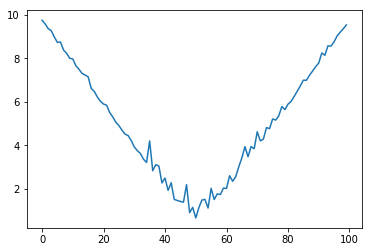

In [179]:
plt.plot(flips, overlap)

The more the flips, the more steps are potentially needed to retrieve the original pattern, the more the energy.

If there're 50% of the flipped pixels, then the overlap is zero, like between any pair of random patterns, so this one is not retrievable.

And if there're more than 50% of the flipped pixels, the overlap is negative, and the pattern will contribute negatively (symmetrically) to the network's activity.

## 8.7.3 Question.
Compute the energy of the reverse of one of the stored patterns $E(-\xi^1)$. What do you observe, what are the consequences on the dynamics of the system and why? (max 3 lines) 
#### [1 + 3 points]

In [180]:
energy(hopfield_net_asynch.weights, pattern_tools.flip_n(pattern_list[0], nr_of_flips=pattern_size**2))[0] == \
energy(hopfield_net_asynch.weights, pattern_list[0])[0]

True

This is to show that the energy function is simmetrical (no wonder, it contains $S_i S_j$). The implication for the dynamics is that there are going to be the local minima that are not retrieval states. Particularly, if the pattern is reversed and the net is deterministic, it is going to get stuck in these minima. But we could revert those states to make them retirevable.

## 8.7.4 Exercise.
1 - Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$ and run the dynamics. What is the energy of this state?

Parameters: number steps = 4.

#### [2 points]

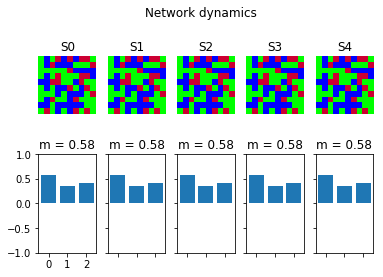

In [181]:
init_state = np.sign(pattern_list[0] + pattern_list[1] + pattern_list[2])
hopfield_net_asynch.set_state_from_pattern(init_state)

# from this initial state, let the network dynamics evolve.
states = hopfield_net_asynch.run_with_monitoring(nr_steps=4)

# each network state is a vector. reshape it to the same shape used to create the patterns.
states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)

# plot the states of the network
plot_tools.plot_state_sequence_and_overlap(states_as_patterns, pattern_list, reference_idx=0, suptitle="Network dynamics")

In [182]:
energy(hopfield_net_asynch.weights, init_state)[0]

-61.240000000000002

2 - Consider the ensemble of all states that differ from $S_0$ in exactly one flip. Initialize the network in each of those states and check what is the final state of the dynamical evolution.

*** Hint: *** Compare the final states with $S_0$.
#### [8 points]

In [184]:
# Function to flip one neuron
def flip_idx(template, idx):
    """
    makes a copy of the template pattern and flips the idx-th state.
    Args:
        template:
        nr_of_flips:
    Returns:
        a new pattern
    """
    shape = template.shape
    template_copy = np.copy(template).reshape(-1)
    template_copy[idx] = -template_copy[idx]
    return template_copy.reshape(shape)

init_state = np.sign(pattern_list[0] + pattern_list[1] + pattern_list[2])
compare = [] # List of bool, whether for a specific flip final_state == s0_flipped.

# Flip all neurons one after the other
for i in range(0, pattern_size**2):
    s0_flipped = flip_idx(init_state, i)
    
    hopfield_net_asynch.set_state_from_pattern(s0_flipped)

    # from this initial state, let the network dynamics evolve.
    final_state = hopfield_net_asynch.run_with_monitoring(nr_steps=4)[0]
    compare.append(np.all(final_state == s0_flipped.reshape(-1)))
    
np.all(compare)

True

3 - What can you tell about the stability of $S_0$? Briefly comment (max 5 lines). 

***Hint:*** For help, refer to the pdf on associative memory on the MOODLE (https://moodle.epfl.ch/pluginfile.php/1091071/mod_resource/content/0/Lecture5/Hertz_Hopfield.pdf).

#### [6 points]

$S_0$ with a single flip is a fixed point for any flipped neuron.

## 8.7.5 Question.
Does your argumentation above hold in the case of $S_0 = sgn(\sum_{\mu}^2 \xi^{\mu})$? Why? (max 3 lines)
#### [3 points]

No, the initial patterns that are linear combinations of the even number of stored patterns are not stable, because they can add up to zero at some sites, and units have to be +1 or -1.

## 8.7.6 Exercise.
Use now the stochastic neuron with asynchronous update you implemented in 8.6.4. Initialize the network with the state $S_0 = sgn(\sum_{\mu}^3 \xi^{\mu})$. For $\beta$ varying in $\beta\in \left[1,2,8,10,100\right]$, plot the overlap of the network initialized with $S_0$ with each of the 3 stored patterns as a function of time. 

What do you observe? Comment on the stability of the spurious state $S_0$ in each case. (max 4 lines)

Parameters: network size = 10x10, number of rnd patterns = 3, on probability = 0.5, number of steps = 9.

*** Hint 1: *** Make 4 plots (or 1 plot with 4 subplots), one for each value of $\beta$.

*** Hint 2: *** You can use the function pattern_tools.compute_overlap_list (or pattern_tools.compute_overlap).
#### [5 + 4 points]

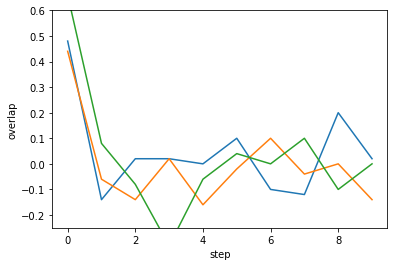

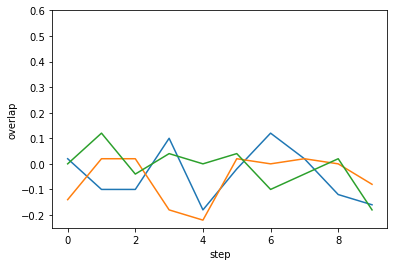

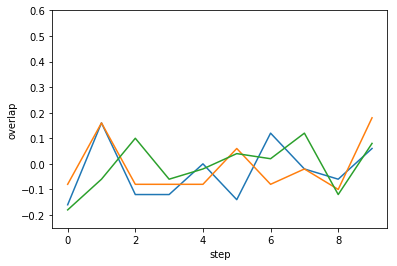

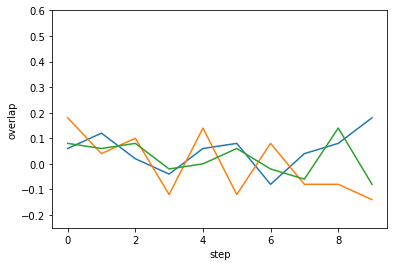

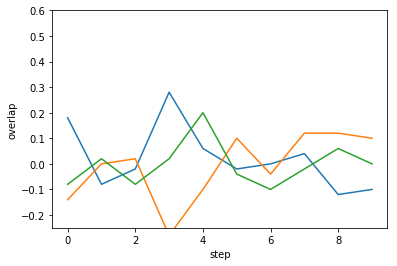

In [186]:
betas = [1, 2, 3, 10, 100]
pattern_size = 10

hopfield_net_asynch_stoch = network.HopfieldNetwork(nr_neurons= pattern_size**2)
factory = pattern_tools.PatternFactory(pattern_size, pattern_size)

pattern_list = []
pattern_list.extend(factory.create_random_pattern_list(nr_patterns=3, on_probability=0.5))

hopfield_net_asynch_stoch.store_patterns(pattern_list)

noisy_init_state = np.sign(pattern_list[0] + pattern_list[1] + pattern_list[2])
hopfield_net_asynch_stoch.set_state_from_pattern(noisy_init_state)

for beta in betas:
    
    hopfield_net_asynch_stoch.set_dynamics_to_user_function(_get_asynch_sigmoid_update_function(beta=beta))

    # from this initial state, let the network dynamics evolve.
    states = hopfield_net_asynch_stoch.run_with_monitoring(nr_steps=9)

    # each network state is a vector. reshape it to the same shape used to create the patterns.
    states_as_patterns = pattern_tools.reshape_patterns(states, pattern_list[0].shape)
    
    # Compute
    overlap = np.zeros((len(pattern_list), len(states)))
    for idx in range(3):
        for i_step, state in enumerate(states_as_patterns):
            overlap[idx, i_step] = pattern_tools.compute_overlap(state, pattern_list[idx])
    # Plot
    plt.plot(np.arange(len(states)), overlap[0, :])
    plt.plot(np.arange(len(states)), overlap[1, :])
    plt.plot(np.arange(len(states)), overlap[2, :])
    plt.ylim(-0.25, 0.6)
    plt.ylabel('overlap')
    plt.xlabel('step')
    plt.show()

$S_0$ has a close to zero overlap with the 3 stored patterns which remains relatively stable over time, given that the network is stochastic asynchronous.